In [656]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import string
import warnings
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [657]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk (13).csv


In [658]:
raw_data = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')

In [659]:
raw_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [660]:
raw_data.drop(['Unnamed: 0'],axis=1,inplace=True)
raw_data.rename({'Text':'Tweets'},axis=1,inplace=True)
raw_data

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


#Data Exploration

In [661]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [662]:
raw_data.describe()

,Tweets
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [663]:
raw_data.isna().sum()

Tweets    0
dtype: int64

In [664]:
raw_data[raw_data.duplicated()]

,Tweets
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [665]:
raw_data['char_count'] = raw_data['Tweets'].str.len()
raw_data.head()

,Tweets,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [666]:
raw_data['word_count'] = raw_data['Tweets'].apply(lambda x: len(str(x).split(" ")))
raw_data.head()

,Tweets,char_count,word_count
0,@kunalb11 Im an alien,22,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13
2,@joerogan @Spotify Great interview!,35,4
3,@gtera27 Doge is underestimated,31,4
4,@teslacn Congratulations Tesla China for amazi...,104,17


In [667]:
raw_data['Special Characters'] = raw_data['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith(('#','$','%','&','*','?'))]))
raw_data[['Tweets','Special Characters']].head()

,Tweets,Special Characters
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [668]:
stop = stopwords.words('english')

raw_data['stopwords'] = raw_data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
raw_data[['Tweets','stopwords']].head()

,Tweets,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [669]:
raw_data['upper'] = raw_data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
raw_data['lower'] = raw_data['Tweets'].apply(lambda x: len([x for x in x.split() if x.islower()]))
raw_data[['Tweets','upper','lower']].head()

,Tweets,upper,lower
0,@kunalb11 Im an alien,0,3
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1,8
2,@joerogan @Spotify Great interview!,0,2
3,@gtera27 Doge is underestimated,0,3
4,@teslacn Congratulations Tesla China for amazi...,0,13


In [670]:
#Spelling correction

from textblob import TextBlob
raw_data['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                               @kunalb11 Im an alien
1    @ID_AA_Carmack May tracing on Cyberpunk with H...
2                   @joerogan @Notify Great interview!
3                       @gtera27 One is underestimated
4    @teslacn Congratulations Cela China for amazin...
Name: Tweets, dtype: object

In [671]:
#Ratio of links attached in the tweets
raw_data.Tweets.str.contains('https://').value_counts() / len(raw_data)

False    0.678339
True     0.321661
Name: Tweets, dtype: float64

In [672]:
#Ratio of @ tags in the tweets
raw_data.Tweets.str.contains('@').value_counts() / len(raw_data)

True     0.83942
False    0.16058
Name: Tweets, dtype: float64

In [673]:
data = pd.DataFrame()
data['Tweets'] = raw_data['Tweets'].copy()

#N-grams

In [674]:
TextBlob(data['Tweets'][3]).ngrams(1)

[WordList(['gtera27']),
 WordList(['Doge']),
 WordList(['is']),
 WordList(['underestimated'])]

In [675]:
TextBlob(data['Tweets'][2]).ngrams(2)

[WordList(['joerogan', 'Spotify']),
 WordList(['Spotify', 'Great']),
 WordList(['Great', 'interview'])]

In [676]:
TextBlob(data['Tweets'][4]).ngrams(3)

[WordList(['teslacn', 'Congratulations', 'Tesla']),
 WordList(['Congratulations', 'Tesla', 'China']),
 WordList(['Tesla', 'China', 'for']),
 WordList(['China', 'for', 'amazing']),
 WordList(['for', 'amazing', 'execution']),
 WordList(['amazing', 'execution', 'last']),
 WordList(['execution', 'last', 'year']),
 WordList(['last', 'year', 'Now']),
 WordList(['year', 'Now', 'on']),
 WordList(['Now', 'on', 'to']),
 WordList(['on', 'to', 'the']),
 WordList(['to', 'the', 'next']),
 WordList(['the', 'next', 'for']),
 WordList(['next', 'for', 'even']),
 WordList(['for', 'even', 'more'])]

#Text Preprocessing

In [677]:
raw_data=[Text.strip() for Text in raw_data.Tweets] # To remove both the leading and the trailing characters
raw_data=[Text for Text in raw_data if Text] # To removes empty strings
raw_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [678]:
# Joining the list into one string/text
tweets_text=' '.join(raw_data)
tweets_text[:100]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [679]:
# Remove Twitter @username handles
from nltk.tokenize import TweetTokenizer
t = TweetTokenizer(strip_handles=True)
tweets_tokens = t.tokenize(tweets_text)
print(tweets_tokens[:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with']


In [680]:
# Joining the list into one string
tweets_tokens_text =' '.join(tweets_tokens)
tweets_tokens_text[:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview'

In [681]:
# Remove Punctuations from combined text
no_punctuations = tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punctuations[:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [682]:
# Remove https or url within text
import re
no_url = re.sub(r'http\S+', '', no_punctuations)
no_url[:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [683]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens = word_tokenize(no_url)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [684]:
print('No. of tokens:',len(text_tokens))

No. of tokens: 17847


In [685]:
# Remove Stopwords
stopwords=stopwords.words('english')

sw = ['\x92','I','rt','ye','yeah','haha','Yes','U0001F923','U0001F3B6','U0001F5A4']
stopwords.extend(sw)

no_sw = [word for word in text_tokens if not word in stopwords]
print(no_sw[:100])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission']


In [686]:
# Making text in Lowercase
lower_case = [Text.lower() for Text in no_sw]
print(lower_case[:100])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission']


In [687]:
# Stemming using NLTK Library
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_case]
print(stemmed_tokens[:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission']


In [688]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')

doc = nlp(' '.join(lower_case))
print(doc[:100])

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission


In [689]:
# Grouping different inflected forms of words into root form, having the same meaning using Lemmatized tokens.
lemmas = [token.lemma_ for token in doc]
print(lemmas[:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission']


In [690]:
# Finally cleansed Tweet text
cleaned_tweets = ' '.join(lemmas)
cleaned_tweets[:1000]

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

#Generate Word Cloud

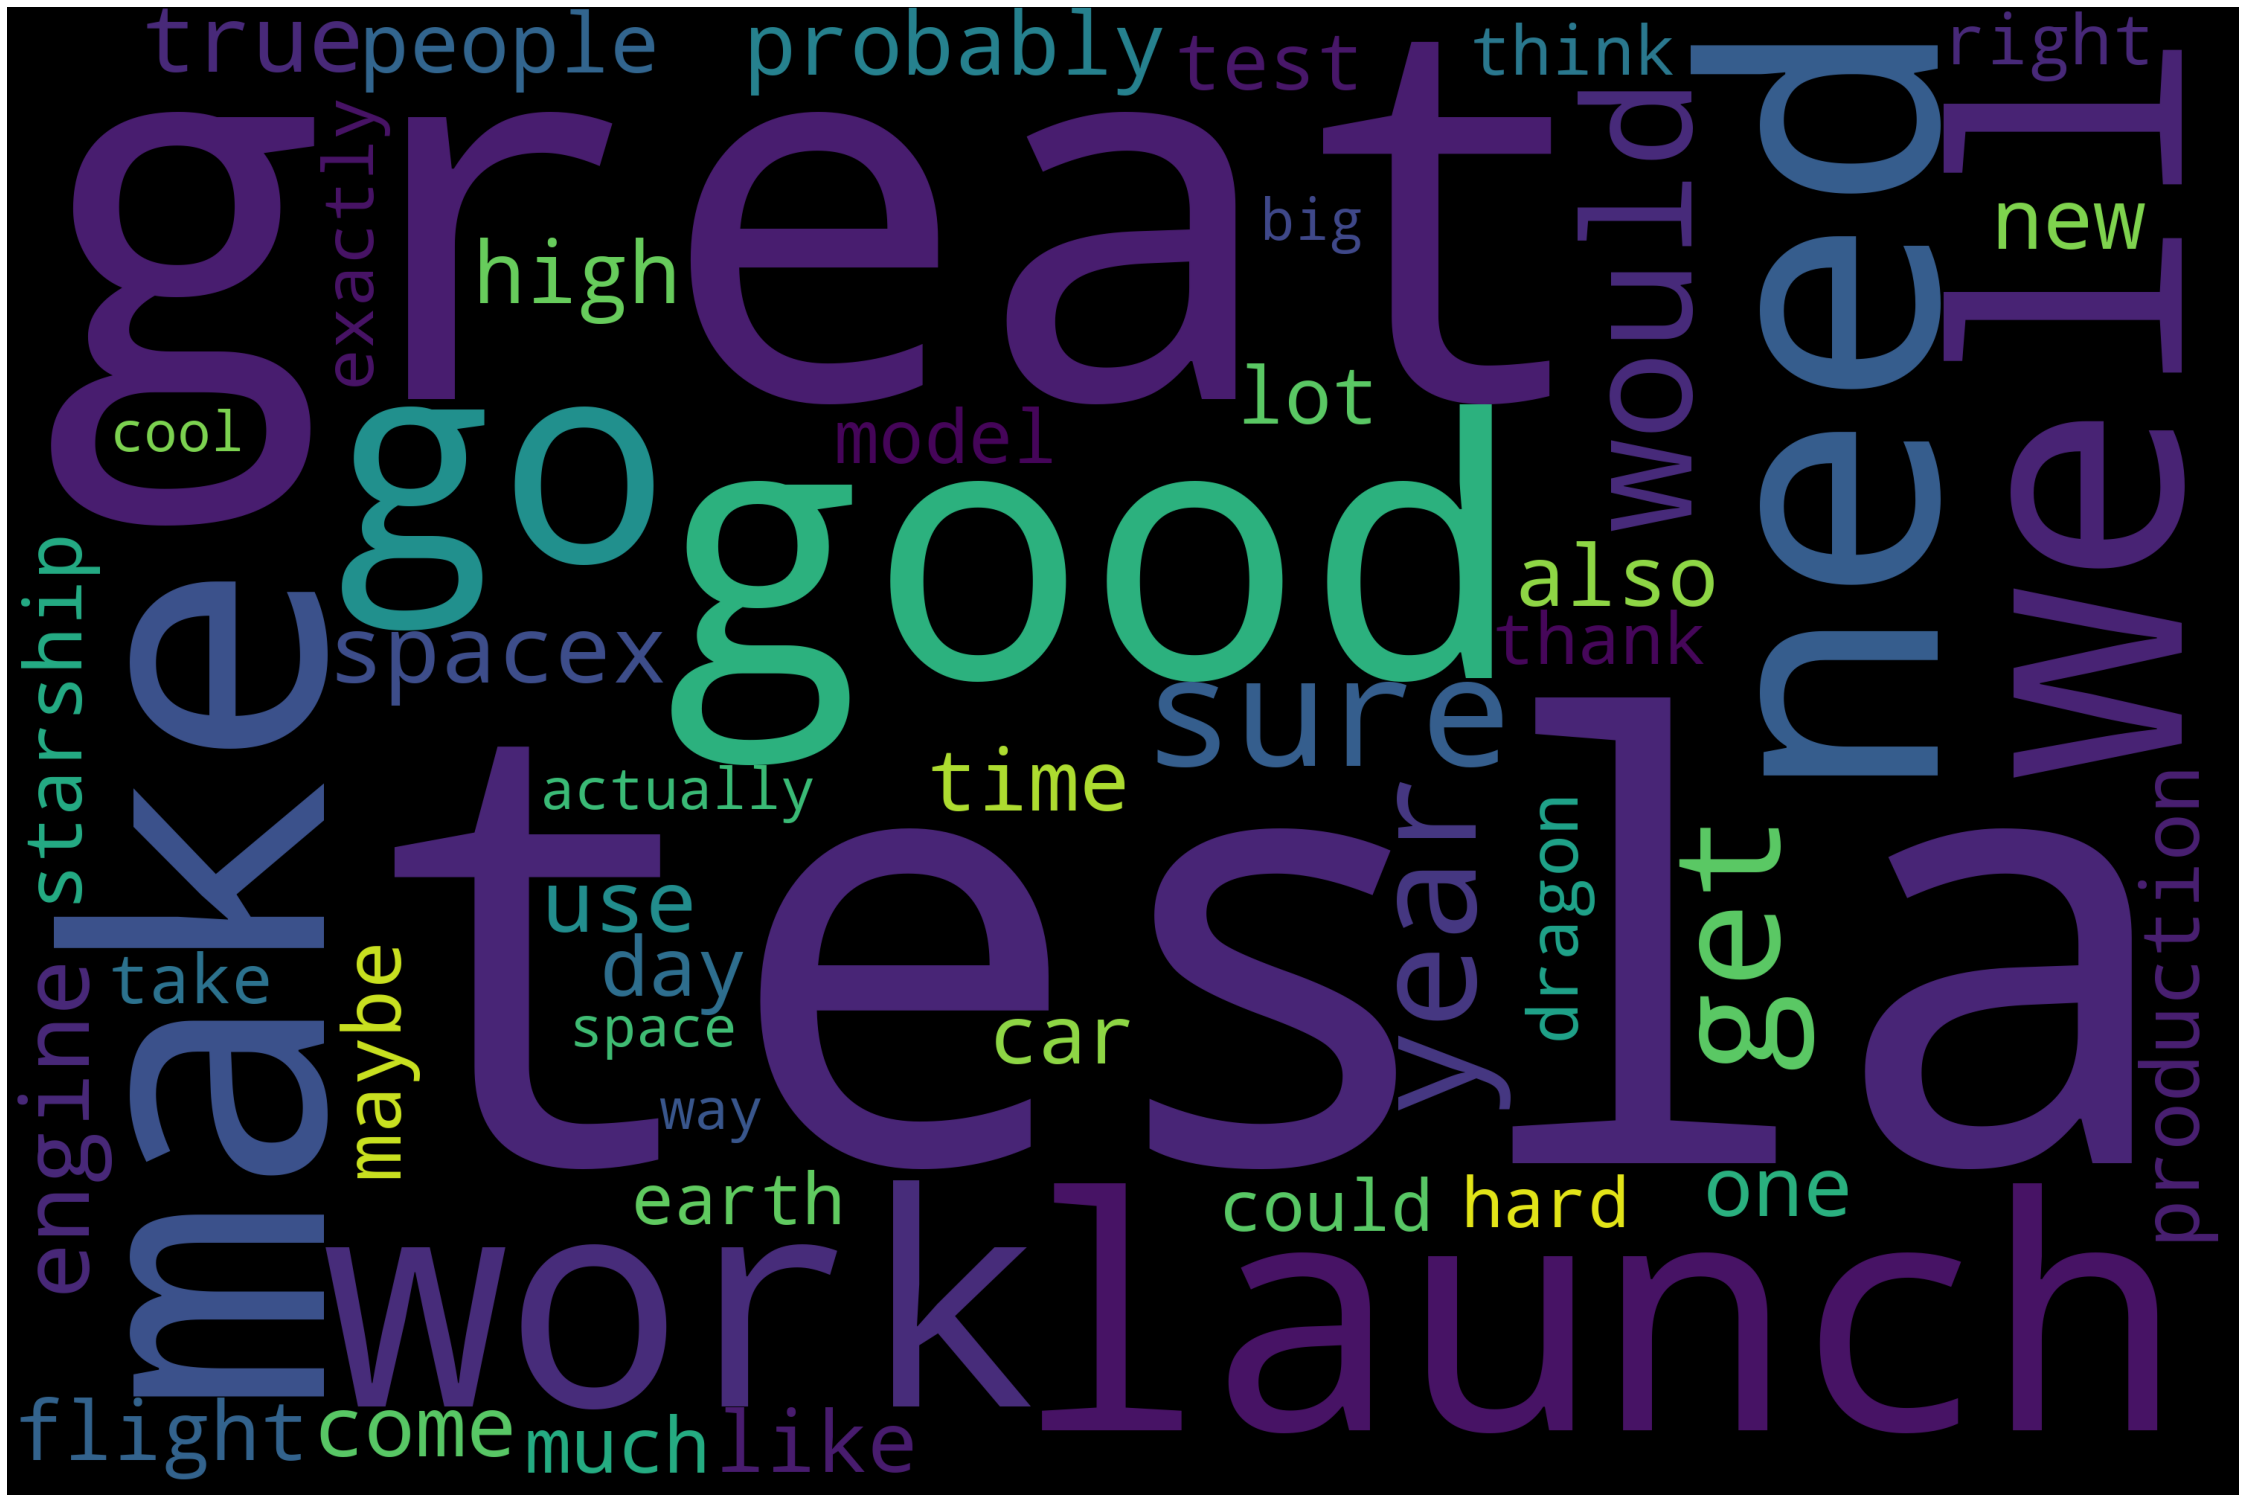

In [691]:
plt.figure(figsize=(40,30))

wordcloud = WordCloud(width=3000,height=2000,max_words=50,stopwords=stopwords).generate(cleaned_tweets)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Text Pre-processing

In [692]:
#Removing @names
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [693]:
data['Tidy_Tweets'] = np.vectorize(remove_pattern)(data['Tweets'], "@[\w]*")
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [694]:
#Removing http/https 
tidy_tweets = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tidy_Tweets.split() if 'http' not in word]
    tidy_tweets.append(' '.join(words_without_links))

data['Tidy_Tweets'] = tidy_tweets
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [695]:
#Removing empty text tweets
data = data[data['Tidy_Tweets']!='']
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [696]:
data = data.reset_index(drop=True)
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [697]:
#Removing Punctuations, Numbers and Special characters
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [698]:
data['Tidy_Tweets'] = data['Tidy_Tweets'].apply(lambda x: clean_text(x))
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [699]:
#Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [700]:
data['Tidy_Tweets']=data['Tidy_Tweets'].apply(lambda x: remove_emoji(x))
data.head(10)

,Tweets,Tidy_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [701]:
data['Tokenized_Tweets'] = data['Tidy_Tweets'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Tweets,Tidy_Tweets,Tokenized_Tweets
0,@kunalb11 Im an alien,im an alien,"[im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,great interview,"[great, interview]"
3,@gtera27 Doge is underestimated,doge is underestimated,"[doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"[congratulations, tesla, china, for, amazing, ..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,"[happy, new, year, of, the, ox]"
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,"[frodo, was, the, underdoge, all, thought, he,..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,"[haha, thanks]"
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,"[indeed, tweets, definitely, do, not, represen..."
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,"[the, most, entertaining, outcome, is, the, mo..."


In [702]:
data.drop(['Tokenized_Tweets'],axis=1,inplace=True)

In [703]:
#Removing Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [704]:
tidy_tweets = []

for index, row in data.iterrows():
    # Filter out all the stopwords 
    words_without_stopwords = [word for word in row.Tidy_Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    # Create tweets containing stopwords and sentimentType 
    tidy_tweets.append(' '.join(words_without_stopwords))
    
data['Absolute_Tidy_Tweets'] = tidy_tweets
data.head(10)

,Tweets,Tidy_Tweets,Absolute_Tidy_Tweets
0,@kunalb11 Im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,indeed tweets definitely represent realworld t...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


In [705]:
tokenized_tweet = data['Absolute_Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: Absolute_Tidy_Tweets, dtype: object

In [706]:
#Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: Absolute_Tidy_Tweets, dtype: object

In [707]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                         [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweet, definitely, represent, realwor...
9                      [entertaining, outcome, likely]
Name: Absolute_Tidy_Tweets, dtype: object

In [708]:
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

data['absolute_tidy_tweets'] = tokenized_tweet
data.head(10)

,Tweets,Tidy_Tweets,Absolute_Tidy_Tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,im an alien,im alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...,congratulation tesla china amazing execution l...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox,happy new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought would fail,frodo underdoge thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks,thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,indeed tweets definitely represent realworld t...,indeed tweet definitely represent realworld ti...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely,entertaining outcome likely


#Feature Extaction


In [709]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweetscv = cv.fit_transform(lemmas)

In [710]:
cv.vocabulary_

{'alien': 195,
 'ray': 2359,
 'trace': 3023,
 'cyberpunk': 769,
 'hdr': 1364,
 'nextlevel': 1969,
 'have': 1359,
 'try': 3055,
 'great': 1312,
 'interview': 1561,
 'doge': 894,
 'underestimate': 3186,
 'congratulation': 677,
 'tesla': 2931,
 'china': 587,
 'amazing': 219,
 'execution': 1063,
 'last': 1645,
 'year': 3403,
 'now': 1997,
 'next': 1968,
 'even': 1037,
 'happy': 1346,
 'new': 1966,
 'ox': 2098,
 'frodo': 1213,
 'underdoge': 3185,
 'all': 198,
 'think': 2959,
 'would': 3389,
 'fail': 1098,
 'himself': 1406,
 'haha': 1335,
 'thank': 2941,
 'indeed': 1502,
 'tweet': 3070,
 'definitely': 807,
 'represent': 2426,
 'realworld': 2374,
 'time': 2982,
 'allocation': 200,
 'the': 2945,
 'entertaining': 1007,
 'outcome': 2076,
 'likely': 1699,
 'just': 1603,
 'send': 2569,
 'agree': 179,
 'clubhouse': 616,
 'it': 1580,
 'get': 1272,
 'real': 2369,
 'buy': 505,
 'dogecoin': 896,
 'lil': 1700,
 'toddler': 2993,
 'hodler': 1412,
 'he': 1365,
 'issue': 1579,
 'sentencing': 2574,
 'seem': 

In [711]:
print(tweetscv.toarray()[:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#CountVectorizer with N-grams (Bigrams & Trigrams)

In [712]:
cv_ngram = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram.fit_transform(lemmas)

In [713]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#TF-IDF Vectorizer

In [714]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix = tfidf_v.fit_transform(lemmas)

In [715]:
tfidf_matix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Named Entity Recognition (NER)

In [716]:
nlp = spacy.load('en_core_web_sm')

one_block = cleaned_tweets[:1000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [717]:
for token in doc_block[:50]:
    print(token,token.pos_)  

alien PROPN
ray NOUN
trace NOUN
cyberpunk PROPN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge X
underestimate PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all PRON
think VERB
would AUX
fail VERB
himself PRON
haha PROPN
thank VERB
indeed ADV
tweet NOUN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
just ADV
send VERB
just ADV
agree VERB


#Filtering out nouns and verbs

In [718]:
# Filtering the nouns and verbs only
one_block = cleaned_tweets
doc_block = nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:200])

['ray', 'trace', 'nextlevel', 'try', 'interview', 'execution', 'year', 'year', 'ox', 'frodo', 'think', 'fail', 'thank', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'power', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'app', 'falcon', 'launch', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'endeavor', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', 'mean', 'price', 'country', 'difference', 'ship', 'intend', 'earth', 'idea', 'apply', 'team', 'manage', 'carbon', 'capture', 'tesla', 'receive', 'stock', 'comp', 'stock', 'option', 'take', 'table', 'miss', 'work', 'go', 'seem', 'appear', 'fix', 'coin', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight',

In [719]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,go,47
5,need,42
6,come,39
7,get,38
8,day,38
9,time,37


<Figure size 864x576 with 0 Axes>

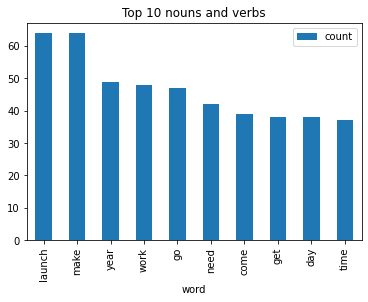

In [720]:
plt.figure(figsize=(12,8))
wd_df[0:10].plot.bar(x='word',title='Top 10 nouns and verbs')
plt.show()

#Sentence Tokenizing

In [721]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(' '.join(raw_data))
sentences[:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [722]:
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


#Text Pre-processing

In [723]:
# BagOfWords features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

# BOW feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(data['Tidy_Tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')

# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(data['Tidy_Tweets'])

In [724]:
data.head()

,Tweets,Tidy_Tweets,Absolute_Tidy_Tweets,absolute_tidy_tweets
0,@kunalb11 Im an alien,im an alien,im alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel tried,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...,congratulation tesla china amazing execution l...


#Fetching sentiments

**1) Using NLTK's SentimentIntensityAnalyzer(SIA)**

In [725]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [726]:
nltk.download('vader_lexicon')
sentiments_SIA = data.absolute_tidy_tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_SIA.value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,absolute_tidy_tweets
pos,1737
neg,201


In [727]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.absolute_tidy_tweets[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [728]:
sia=pd.DataFrame()
sia['Tweets'] = data.absolute_tidy_tweets
sia['scores'] = data['Tidy_Tweets'].apply(lambda review: sid.polarity_scores(review))
sia.head()

,Tweets,scores
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [729]:

sia['compound']  = sia['scores'].apply(lambda scores: scores['compound'])
sia.head()

,Tweets,scores,compound
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


In [730]:
sia['sentiment'] = sia['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
sia


,Tweets,scores,compound,sentiment
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,ray tracing cyberpunk hdr nextlevel tried,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive
...,...,...,...,...
1933,true sound surreal negative propaganda still a...,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",-0.4215,Negative
1934,make sure read ur term amp condition clicking ...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.5994,Positive
1935,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1936,altho dumb dumber,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp...",-0.7003,Negative


In [731]:
temp = sia.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Tweets
2,Positive,873
1,Neutral,836
0,Negative,229


<Axes: xlabel='sentiment', ylabel='count'>

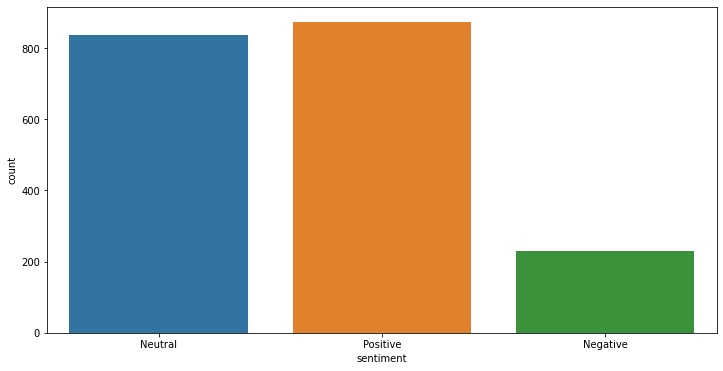

In [732]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=sia)

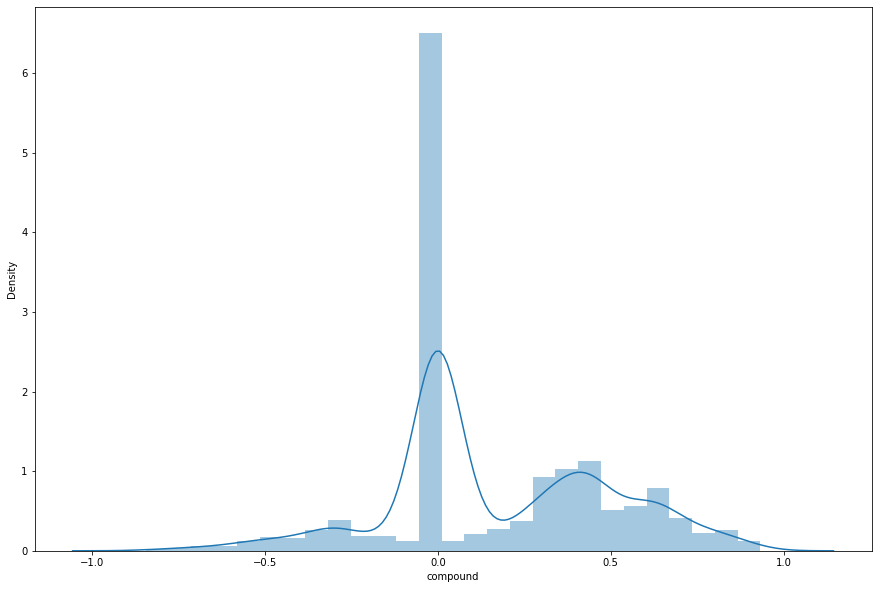

In [733]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sia['compound'])
plt.show()

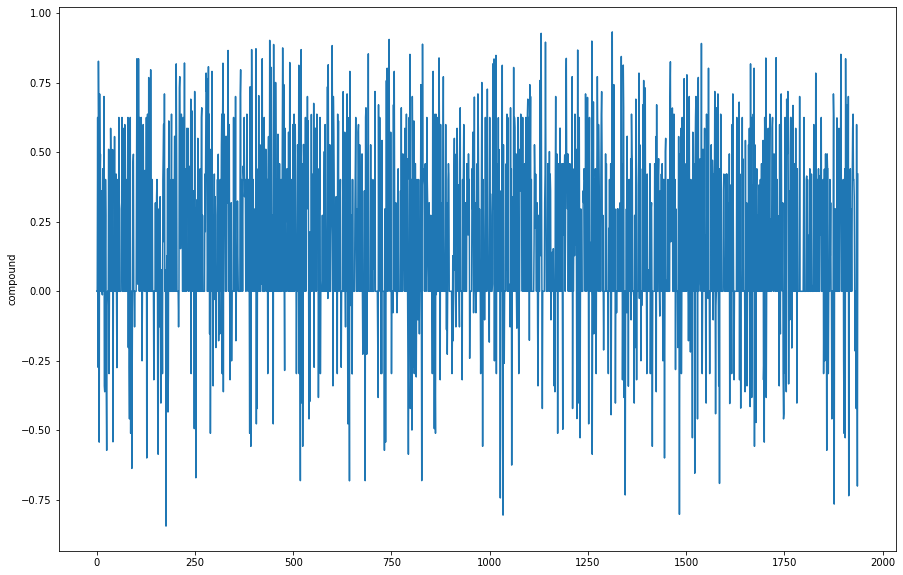

In [734]:
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x=sia.index,data=sia)
plt.show()

In [735]:
data.describe()

,Tweets,Tidy_Tweets,Absolute_Tidy_Tweets,absolute_tidy_tweets
count,1938,1938,1938,1938
unique,1936,1661,1624,1624
top,The most entertaining outcome is the most likely,,,
freq,2,80,124,124


**Hence, our given data is cleansed using sentimental analysis.**